In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
from obspy.signal.trigger import classic_sta_lta, trigger_onset
from scipy import signal
from datetime import timedelta
from matplotlib import cm
import torch

In [5]:
# Load catalog and seismic data with lengths
data_directory = '../../data/marsquake_data/training/data/'
catalog_path = '../../data/marsquake_data/training/catalogs/Mars_InSight_training_catalog.csv'
catalog = pd.read_csv(catalog_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Plotting seismic trace from MSEED: XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed


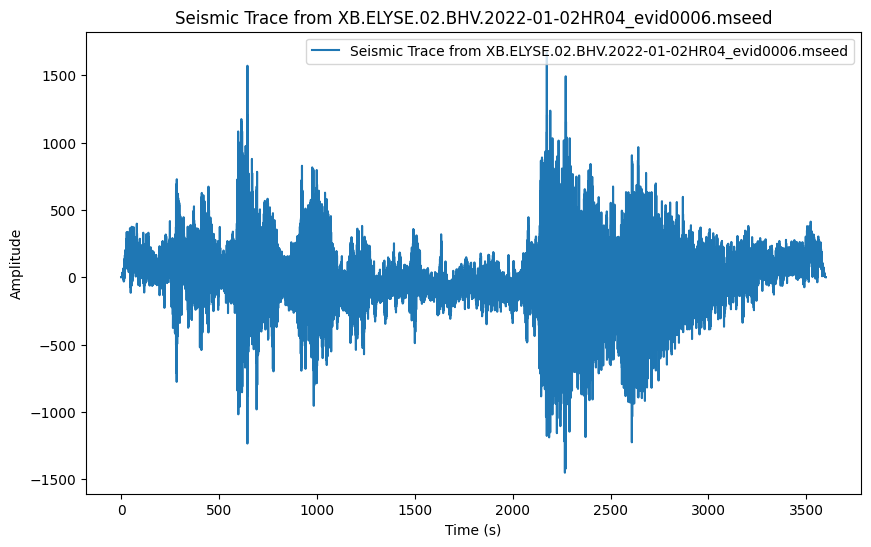

Plotting seismic trace from MSEED: XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed


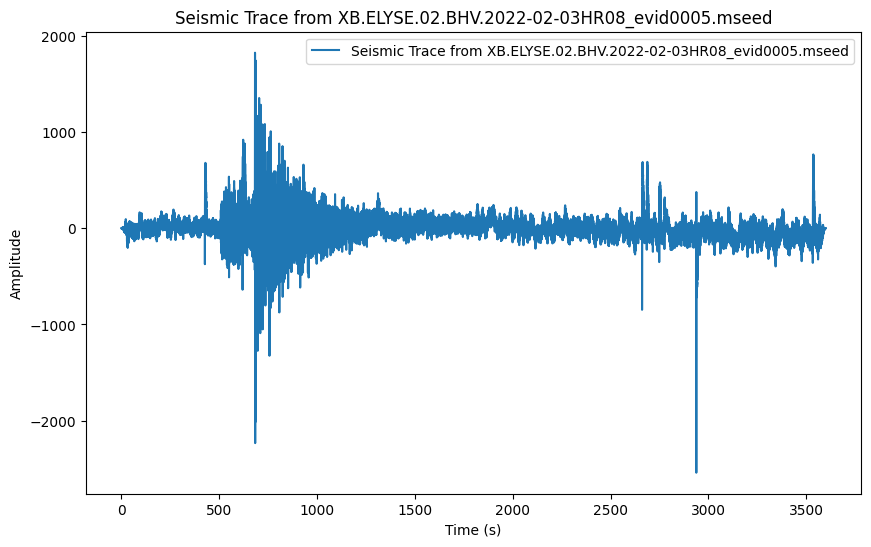

Plotting seismic trace from CSV: XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.csv


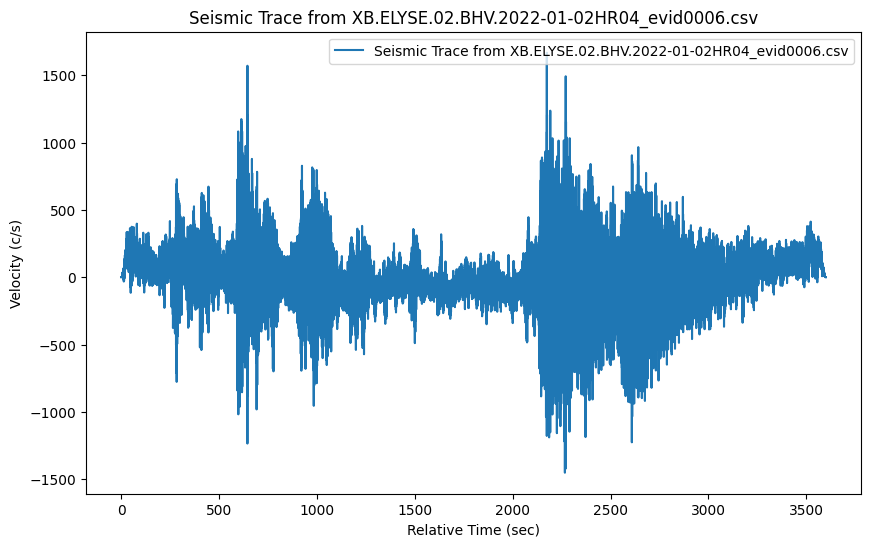

Plotting seismic trace from CSV: XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.csv


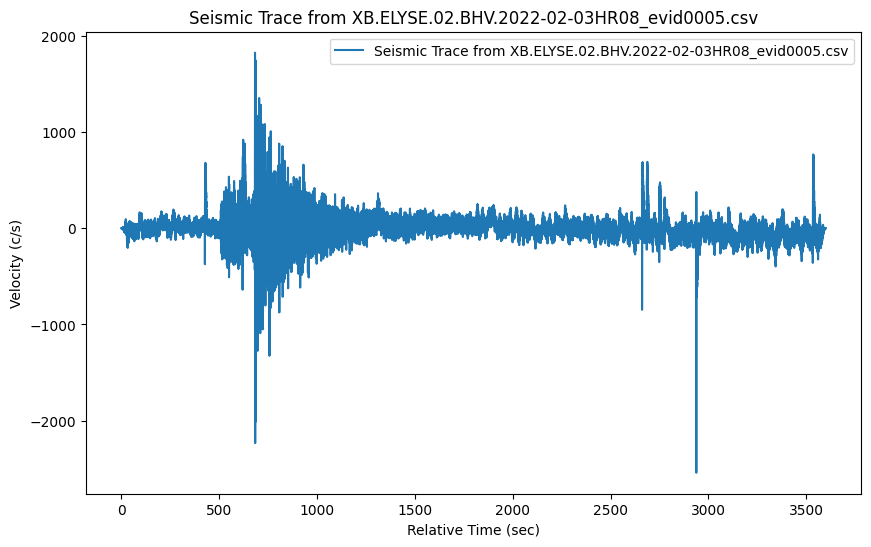

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read

def plot_seismic_trace_from_csv(csv_file):
    """
    Plot seismic trace from CSV file.
    
    Parameters:
    - csv_file: Path to the seismic data CSV file.
    """
    seismic_data = pd.read_csv(csv_file)
    
    # Extract relevant columns
    time_rel = seismic_data['rel_time(sec)']
    velocity = seismic_data['velocity(c/s)']
    
    # Plot the seismic trace
    plt.figure(figsize=(10, 6))
    plt.plot(time_rel, velocity, label=f'Seismic Trace from {os.path.basename(csv_file)}')
    
    plt.xlabel('Relative Time (sec)')
    plt.ylabel('Velocity (c/s)')
    plt.title(f'Seismic Trace from {os.path.basename(csv_file)}')
    plt.legend()
    plt.show()

def plot_seismic_trace_from_mseed(mseed_file):
    """
    Plot seismic trace from MSEED file.
    
    Parameters:
    - mseed_file: Path to the seismic data MSEED file.
    """
    # Read the MSEED file
    st = read(mseed_file)
    tr = st[0]
    tr_data = tr.data
    tr_times = tr.times()
    
    # Plot the seismic trace
    plt.figure(figsize=(10, 6))
    plt.plot(tr_times, tr_data, label=f'Seismic Trace from {os.path.basename(mseed_file)}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Seismic Trace from {os.path.basename(mseed_file)}')
    plt.legend()
    plt.show()

def plot_all_traces_in_directory(data_directory):
    """
    Plot all seismic traces (from CSV and MSEED) in the given data directory.
    
    Parameters:
    - data_directory: Directory containing the CSV and MSEED seismic data files.
    """
    # List all files in the directory
    files = os.listdir(data_directory)
    
    for file in files:
        file_path = os.path.join(data_directory, file)
        
        if file.endswith('.csv'):
            print(f"Plotting seismic trace from CSV: {file}")
            plot_seismic_trace_from_csv(file_path)
        
        elif file.endswith('.mseed'):
            print(f"Plotting seismic trace from MSEED: {file}")
            plot_seismic_trace_from_mseed(file_path)

# Example usage
data_directory = '../../data/marsquake_data/training/data/'

# Plot all traces from both CSV and MSEED files in the directory
plot_all_traces_in_directory(data_directory)
